## Logフィルタ

True

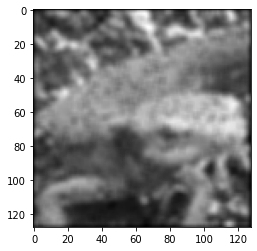

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def BGR2GRAY(img):
    out = 0.2126*img[:,:,0].copy() + 0.7152*img[:,:,1].copy() + 0.0722*img[:,:,2].copy()
    out = out.astype(np.uint8)
    
    return out


def log_filter(img, K_size=5, sigma=3):
    if len(img.shape)==3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape
    
    # Zeropadding
    pad = K_size//2
    out = np.zeros((H+2*K_size, W+2*K_size, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
    tmp = out.copy()
    
    # prepare kernel 
    K = np.zeros((K_size, K_size), dtype=np.float)
    for y in range(-pad, -pad+K_size):
        for x in range(-pad,-pad+K_size):
            K[y+pad, x+pad] = np.exp(-(x**2+y**2)/(2*(sigma**2))) * (x**2+y**2-2*(sigma**2)) / (2*np.pi*(sigma**2))
                                                                                              
    K /= K.sum()
                      
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y, x, c] = np.sum(K*tmp[y:y+K_size, x:x+K_size, c])
    out = out[:H, :W]
    out = np.clip(out, 0, 255).astype(np.uint8)
    
    return out

img = cv2.imread('../imori_noise.jpg')
gray = BGR2GRAY(img)
out = log_filter(gray, K_size=5, sigma=3)
out = np.squeeze(out)
plt.imshow(out, cmap='gray')
cv2.imwrite('out19.jpg', out)